> We are going to use the `USA_Housing` or `sample_data/california_housing...` dataset. Since house price is a continues variable, this is a regression problem. The data contains the following columns:

> * '`Avg. Area Income`': Avg. Income of residents of the city house is located in.
> * '`Avg. Area House Age`': Avg Age of Houses in same city
> * '`Avg. Area Number of Rooms`': Avg Number of Rooms for Houses in same city
> * '`Avg. Area Number of Bedrooms`': Avg Number of Bedrooms for Houses in same city
> * '`Area Population`': Population of city hou  se is located in
> * '`Price`': Price that the house sold at
> * '`Address`': Address for the house

Let's try and create a model that can predict the price of a house based on the variables and historical data


# Import standard libraries

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

## Explore the data a bit.
### List:

1.   First few rows
2.   Basic statistic
3.   .info()
4.   Column names

Questions:

1. What is the dependent variable (column name)?
2. What are the independent variables?
3. Should we normalize the data?
4. What are the column data-types?

In [ ]:
housing = pd.read_csv("./data/USA_Housing.csv")
housing.head(10)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
5,80175.754159,4.988408,6.104512,4.04,26748.428425,1.068138e+06,"06039 Jennifer Islands Apt. 443\nTracyport, KS..."
6,64698.463428,6.025336,8.147760,3.41,60828.249085,1.502056e+06,"4759 Daniel Shoals Suite 442\nNguyenburgh, CO ..."
7,78394.339278,6.989780,6.620478,2.42,36516.358972,1.573937e+06,"972 Joyce Viaduct\nLake William, TN 17778-6483"
8,59927.660813,5.362126,6.393121,2.30,29387.396003,7.988695e+05,USS Gilbert\nFPO AA 20957
9,81885.927184,4.423672,8.167688,6.10,40149.965749,1.545155e+06,Unit 9446 Box 0958\nDPO AE 97025


In [51]:
housing[housing.columns].describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [33]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [34]:
print(housing.columns)

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')


### Answers

1. The dependant variable is the price, since the value is depending on the other values in the dataset
2. All the other columns
3. Yes
4. Address is an object. All other columns are float

# Exploratory Data Analysis (EDA)

Create some simple plots to check out the data!

1.   Plot the pairwise scatter-plot between each column
2.   Plot the distribution of the values of the dependent variable
3.   Plot the pairwise correlation heatmap of each column.

Answer questions:

1.  What are the assumptions of the linear regression model?
2.  Can we accept the basic assumptions of the linear regression model?
3.  Judging by the scatter-plots, do you see any patterns in the data?
4.  Judging by the correlation heat-map, is there correlation between the dependent variable and the independent variables?
5.  Are there correlations among independent variables?


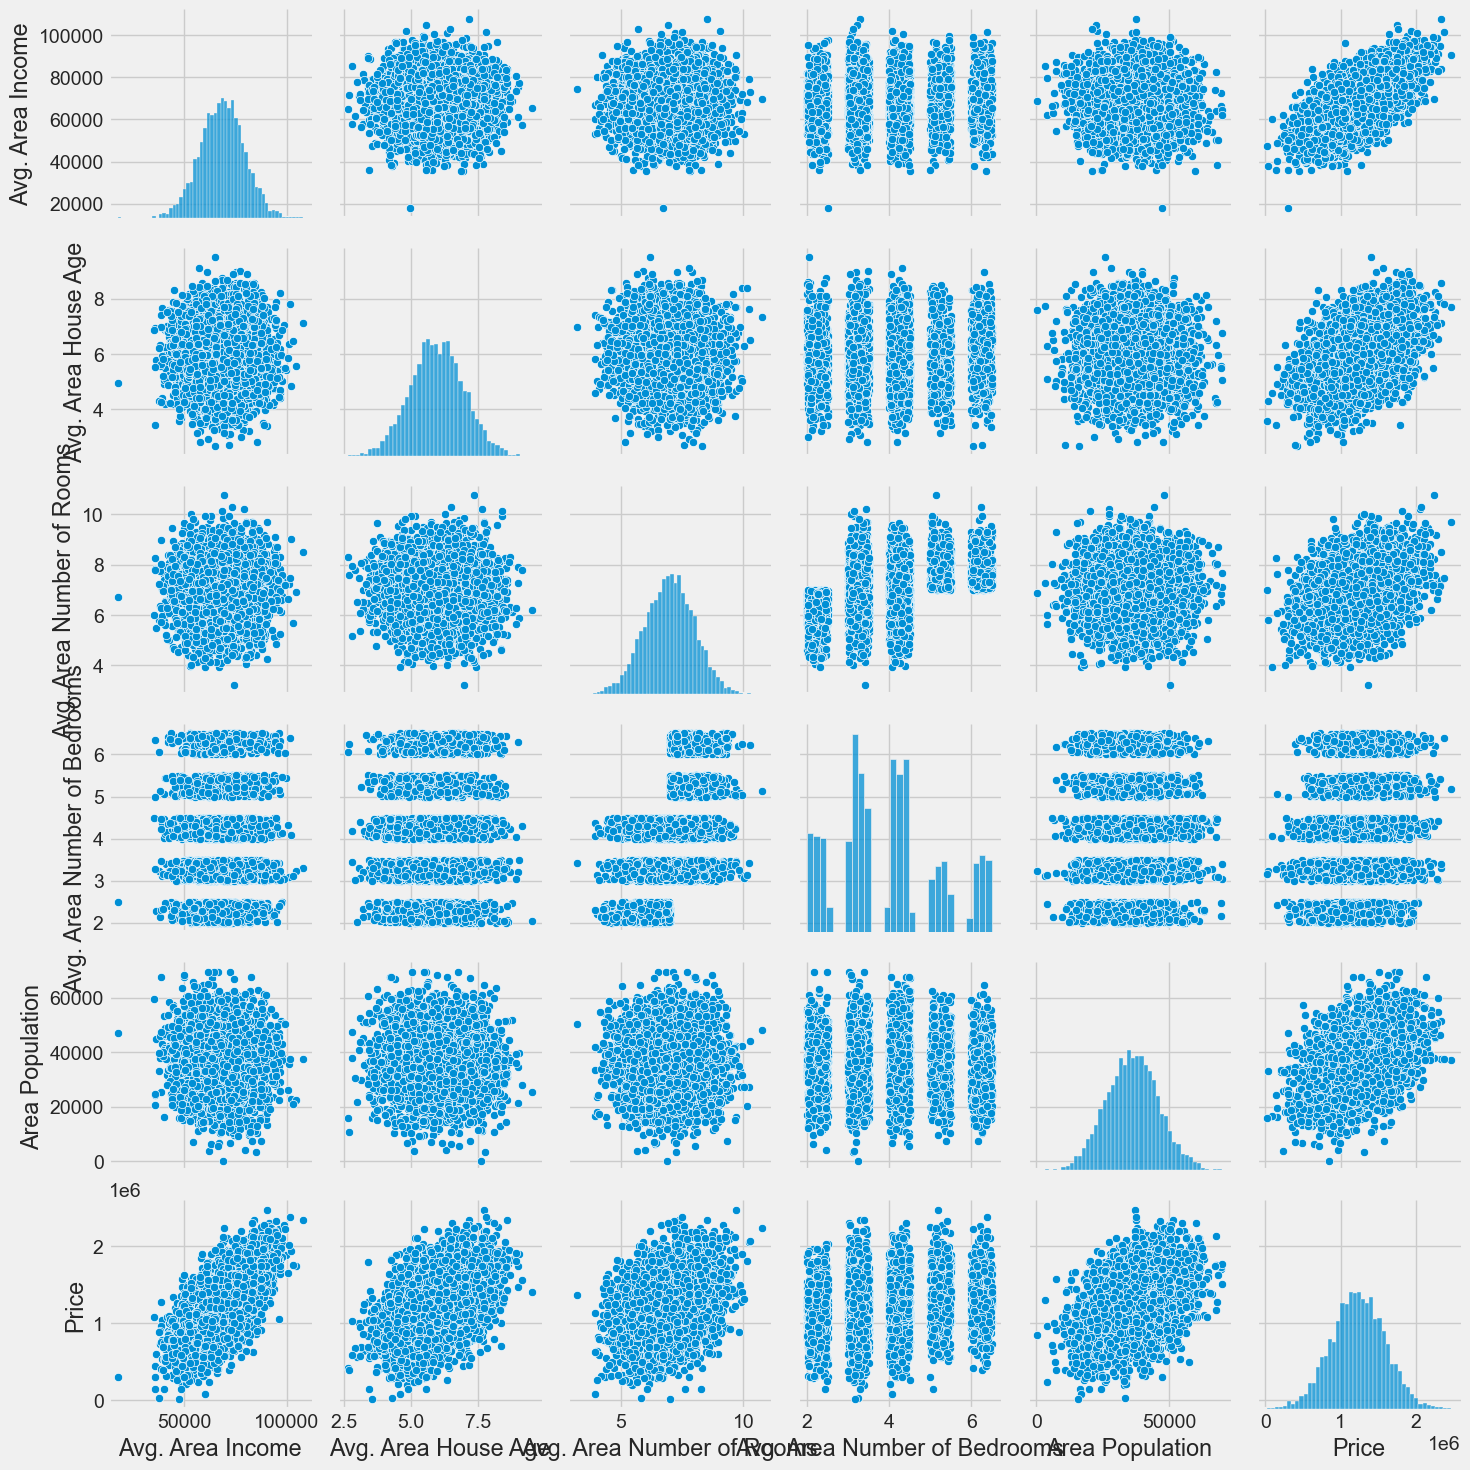

In [52]:
sns.pairplot(housing)
plt.show()

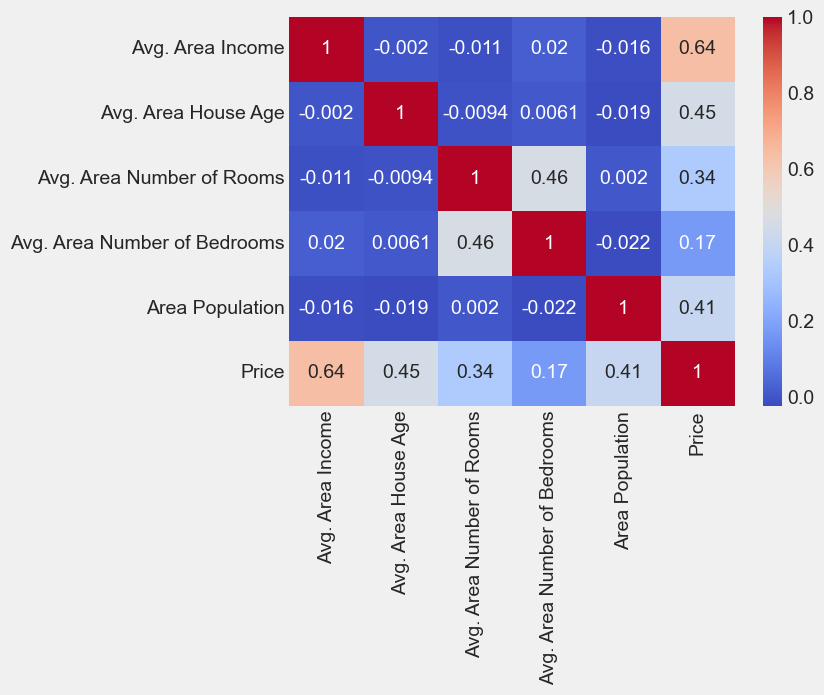

In [48]:
housing_correlation = housing.corr(numeric_only=True)

sns.heatmap(housing_correlation, annot=True, cmap="coolwarm")
plt.show()

### Answers

1. **What are the assumptions of the linear regression model?** That there is a linear relation between the independent variables and the dependent variable
2. **Can we accept the basic assumptions of the linear regression model?** Yes in this case it's okay
3. **Judging by the scatter-plots, do you see any patterns in the data?** The bigger the income, house age and number of rooms the bigger the price is also
4. **Judging by the correlation heat-map, is there correlation between the dependent variable and the independent variables?** Yes. Especially the area income and the price has a correlation
5. **Are there correlations among independent variables?** yes, number of rooms and number of bedrooms are correlated

# Training a Linear Regression Model
## X and y arrays

Tasks:

1. Split the data-frame into an `X` array and and `y` array
2. Are all columns useful for linear regression? Is there some that should be excluded? Exclude the useless ones

In [57]:
X = housing[["Avg. Area Income", "Avg. Area House Age", "Avg. Area Number of Rooms",  "Area Population"]]
Y = housing["Price"]

## Train / Test Split

We need to split the data into the train and test subsets.

In [62]:
from sklearn.model_selection import train_test_split

# Split the data here
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [85]:
from sklearn import metrics

def print_evaluate(true, predicted):

    mae, mse, rmse, r2_square = evaluate(true, predicted)

    #Print mean absolute error
    print('MAE:', mae)
    #Print mean square error
    print('MSE:', mse)
    # Print root square error
    print('RMSE:', rmse)
    # Print R2 score
    print('R2 Square', r2_square)
    print('__________________________________')

def evaluate(true, predicted):
    # Fill in the code necessary to calculate these metrics and use this
    # function to print them in the previous function
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(mse)
    r2_square = metrics.r2_score(true, predicted)

    return mae, mse, rmse, r2_square


# Preparing Data For Linear Regression
> Linear regression is been studied at great length, and there is a lot of literature on how your data must be structured to make best use of the model.

> As such, there is a lot of sophistication when talking about these requirements and expectations. In practice, you can uses these rules more as rules of thumb when using Ordinary Least Squares Regression, the most common implementation of linear regression.

> Try different preparations of your data using these heuristics and see what works best for your problem.

Assess the following steps using the plots you made earlier and answer whether the assumtions and conditions are being met:

- **Linear Assumption.** Linear regression assumes that the relationship between your input and output is linear. You may need to transform data to make the relationship linear (e.g. log transform for an exponential relationship).

Answer:

- **Rescale Inputs:** Linear regression will often make more reliable predictions if you rescale input variables using standardization or normalization.

Answer:

- **Remove Collinearity.** Linear regression will over-fit your data when you have highly correlated input variables. Consider calculating pairwise correlations for your input data and removing the most correlated.

Answer:



In [64]:
# Hint:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ("scaler", StandardScaler())
    ])

scaler = StandardScaler()
X_train_trans = scaler.fit_transform(X_train)

# Linear Regression

Take the most correlated dependent/independent pair and calculate the `beta` parameters for Simple linear regression.

Use `skitlearn` to fit the linear model and see if your calculation corresponds to what the library did.

Use `skitlearn` to fit the linear model dependent on all independent variables (normalize inputs).

In [92]:
#linear model calculated manually
from sklearn.linear_model import LinearRegression


X_train_income = X_train["Avg. Area Income"]

X_train_income_norm = scaler.fit_transform(X_train_income.values.reshape(-1, 1)).flatten()

# Calculate slope (β₁)
cov = np.cov(X_train_income_norm, y_train, bias=True)[0][1]
var = np.var(X_train_income_norm)
beta_1 = cov / var

# Calculate intercept (β₀)
beta_0 = y_train.mean() - beta_1 * X_train_income_norm.mean()

print(f"Manual calculation: β₀ = {beta_0:.2f}, β₁ = {beta_1:.2f}")

#Linear model using skitlearn
# Reshape X to 2D
X_simple_reshaped = X_train_income.values.reshape(-1, 1)

model_simple = Pipeline([
    ("scaler", StandardScaler()),
    ("regressor", LinearRegression())
])
model_simple.fit(X_simple_reshaped, y_train)

coefficients = model_simple.named_steps["regressor"].coef_
intercept = model_simple.named_steps["regressor"].intercept_

print(f"scikit-learn: β₀ = {intercept:.2f}, β₁ = {coefficients[0]:.2f}")

#linear model dependent on all variables
# Create pipeline: Standardize then fit Linear Regression
model_all = Pipeline([
    ("scaler", StandardScaler()),
    ("regressor", LinearRegression())
])

model_all.fit(X_train, y_train)

# Get coefficients
coefficients = model_all.named_steps["regressor"].coef_
intercept = model_all.named_steps["regressor"].intercept_

print("\n")
print("Linear model dependent on all variables:")
print("Intercept:", intercept)
print("Coefficients:")
for feature, coef in zip(X_train.columns, coefficients):
    print(f"{feature}: {coef:.2f}")

Manual calculation: β₀ = 1229576.99, β₁ = 226997.28
scikit-learn: β₀ = 1229576.99, β₁ = 226997.28


Linear model dependent on all variables:
Intercept: 1229576.9925600903
Coefficients:
Avg. Area Income: 231822.63
Avg. Area House Age: 163616.24
Avg. Area Number of Rooms: 122117.36
Area Population: 152187.97


## Model Evaluation


Compare the error from models that used only one independent variable vs. the model that used several independent variables. Did we gain anything from including extra independent dimensions?

In [98]:
y_train_predict = model_simple.predict(X_simple_reshaped)

print_evaluate(y_train, y_train_predict)

y_train_predict_all = model_all.predict(X_train)

print_evaluate(y_train, y_train_predict_all)

MAE: 217433.34434587293
MSE: 73516880985.96854
RMSE: 271139.96567449905
R2 Square 0.41207493392562
__________________________________
MAE: 81489.37808061016
MSE: 10263326295.803938
RMSE: 101308.07616278151
R2 Square 0.9179227041506954
__________________________________


## Predictions from our Model

Tasks:

1.  Take the test data and plot the predicted vs. true value scatter plot.

2.  Plot the histogram of residual values

3.  Make a scatter plot of residuals depending on the predicted value.

MAE: 216826.35309989064
MSE: 74194887058.66
RMSE: 272387.38417676394
R2 Square 0.39694865192619777
__________________________________
MAE: 80857.7894404619
MSE: 10073721633.872414
RMSE: 100367.93130214658
R2 Square 0.9181214278738103
__________________________________


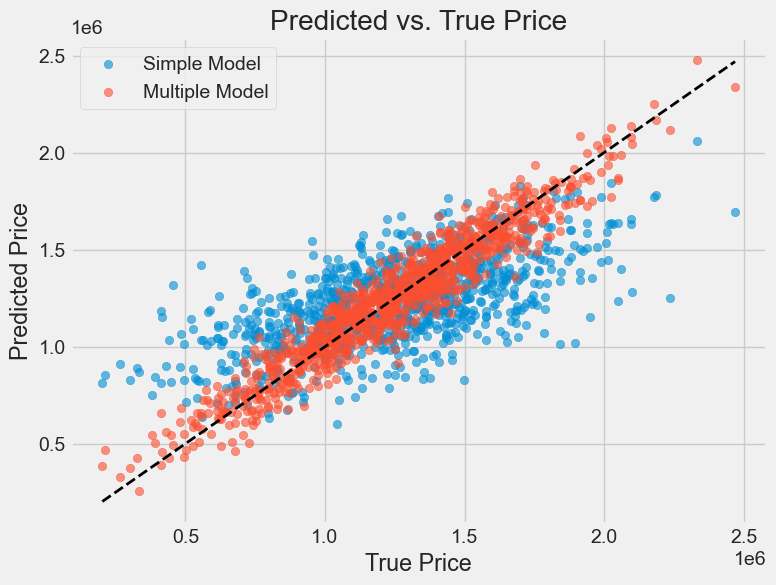

In [100]:
y_test_simple_predict = model_simple.predict(X_test["Avg. Area Income"].values.reshape(-1, 1))

print_evaluate(y_test, y_test_simple_predict)

y_test_predict = model_all.predict(X_test)

print_evaluate(y_test, y_test_predict)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_simple_predict, alpha=0.6, label='Simple Model')
plt.scatter(y_test, y_test_predict, alpha=0.6, label='Multiple Model')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("True Price")
plt.ylabel("Predicted Price")
plt.title("Predicted vs. True Price")
plt.legend()
plt.grid(True)
plt.show()

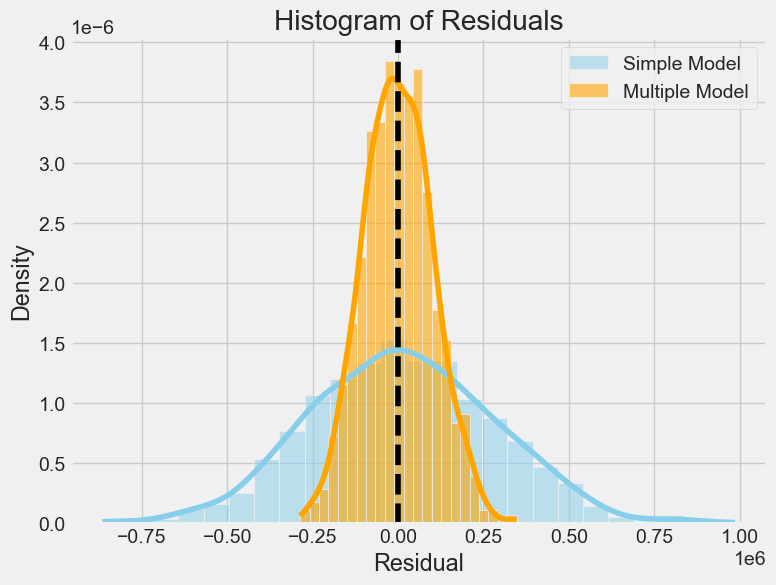

In [ ]:
residual_simple = y_test - y_test_simple_predict
residual_all = y_test - y_test_predict

plt.figure(figsize=(8, 6))
sns.histplot(residual_simple, kde=True, color="skyblue", label="Simple Model", stat="density")
sns.histplot(residual_all, kde=True, color="orange", label="Multiple Model", stat="density", alpha=0.6)
plt.axvline(0, color='black', linestyle='--')
plt.title("Histogram of Residuals")
plt.xlabel("Residual")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()


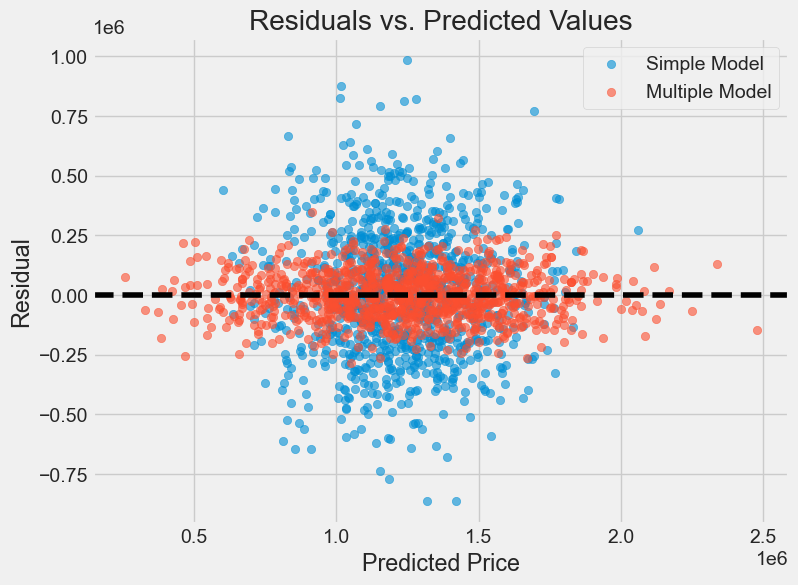

In [103]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test_simple_predict, residual_simple, alpha=0.6, label="Simple Model")
plt.scatter(y_test_predict, residual_all, alpha=0.6, label="Multiple Model")
plt.axhline(0, color='black', linestyle='--')
plt.xlabel("Predicted Price")
plt.ylabel("Residual")
plt.title("Residuals vs. Predicted Values")
plt.legend()
plt.grid(True)
plt.show()

## Regression Evaluation Metrics


Here are three common evaluation metrics for regression problems:

> - **Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:
$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

> - **Mean Squared Error** (MSE) is the mean of the squared errors:
$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

> - **Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:
$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

> 📌 Comparing these metrics:
- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, and is easier to calculate derivations.
- **RMSE** RMSE is more interpretable.

> All of these are **loss functions**,

Tasks:

1.  What is the interpretation of the $R^2$ score?

2.  Pack these values into a Pandas data frame

### Answer

1. The interpretation of the $R^2$ score is a range from 0-1. It measures how well our model can explain the variations of the data. 

In [ ]:

simple_predict_error = evaluate(y_test, y_test_simple_predict)
predict_error = evaluate(y_test, y_test_predict)

pred_simple_err = pd.DataFrame([simple_predict_error], columns=["MAE", "MSE", "RMSE", "R2 Square"])
pred_err = pd.DataFrame([predict_error], columns=["MAE", "MSE", "RMSE", "R2 Square"])

print("\nPrediction Error for Simple Model:")
print(pred_simple_err)
print("Prediction Error for Multiple Model:")
print(pred_err)


Prediction Error for Simple Model:
Prediction Error for Multiple Model:


,MAE,MSE,RMSE,R2 Square
0,80857.78944,1.007372e+10,100367.931302,0.918121


# Polynomial Regression
> Source: [scikit-learn](http://scikit-learn.org/stable/modules/linear_model.html#polynomial-regression-extending-linear-models-with-basis-functions)

***

> One common pattern within machine learning is to use linear models trained on nonlinear functions of the data. This approach maintains the generally fast performance of linear methods, while allowing them to fit a much wider range of data.

> For example, a simple linear regression can be extended by constructing polynomial features from the coefficients. In the standard linear regression case, you might have a model that looks like this for two-dimensional data:

$$\hat{y}(w, x) = w_0 + w_1 x_1 + w_2 x_2$$

> If we want to fit a paraboloid to the data instead of a plane, we can combine the features in second-order polynomials, so that the model looks like this:

$$\hat{y}(w, x) = w_0 + w_1 x_1 + w_2 x_2 + w_3 x_1 x_2 + w_4 x_1^2 + w_5 x_2^2$$

> The (sometimes surprising) observation is that this is still a linear model: to see this, imagine creating a new variable

$$z = [x_1, x_2, x_1 x_2, x_1^2, x_2^2]$$

> With this re-labeling of the data, our problem can be written

$$\hat{y}(w, x) = w_0 + w_1 z_1 + w_2 z_2 + w_3 z_3 + w_4 z_4 + w_5 z_5$$

> We see that the resulting polynomial regression is in the same class of linear models we’d considered above (i.e. the model is linear in w) and can be solved by the same techniques. By considering linear fits within a higher-dimensional space built with these basis functions, the model has the flexibility to fit a much broader range of data.
***

Tasks:

1.  Fit the data to polynomial model of degree 2
2.  Repeat the analysis from the simple regression and show the loss functions
3.  Did polynomoial regression improve the fit? how did you come to that conclusion?

In [139]:
# Hint:
from sklearn.preprocessing import PolynomialFeatures

polypipe = Pipeline([
    ("scaler", StandardScaler()),
    ("poly_features", PolynomialFeatures(degree=2)),
    ("regressor", LinearRegression())
])

print("Fit on Avg. Area Income with polynomial features")
polypipe.fit(X_train_income.values.reshape(-1, 1), y_train)
y_train_poly_s_predict = polypipe.predict(X_train_income.values.reshape(-1, 1))
print_evaluate(y_train, y_train_poly_s_predict)

y_test_poly_s_predict = polypipe.predict(X_test["Avg. Area Income"].values.reshape(-1, 1))
print_evaluate(y_test, y_test_poly_s_predict)


print("Fit on all features with polynomial features")
polypipe.fit(X_train, y_train)

y_train_poly_predict = polypipe.predict(X_train)
print_evaluate(y_train, y_train_poly_predict)

y_test_poly_predict = polypipe.predict(X_test)
print_evaluate(y_test, y_test_poly_predict)

test_p_simple_predict_error = evaluate(y_test, y_test_poly_s_predict)
test_p_predict_error = evaluate(y_test, y_test_poly_predict)

test_p_pred_simple_err = pd.DataFrame([test_p_simple_predict_error], columns=["MAE", "MSE", "RMSE", "R2 Square"])
test_p_pred_err = pd.DataFrame([test_p_predict_error], columns=["MAE", "MSE", "RMSE", "R2 Square"])


print("========== Test simple ===========")
print("    Old linear model:")
print(pred_simple_err)

print("    Poly linear model:")
print(test_p_pred_simple_err)

print("========== Test multivariate ===========")
print("    Old linear model:")
print(pred_err)

print("    Poly linear model:")
print(test_p_pred_err)


Fit on Avg. Area Income with polynomial features
MAE: 217232.5695107132
MSE: 73435995075.27272
RMSE: 270990.7656642062
R2 Square 0.41272179018166
__________________________________
MAE: 217021.51642834107
MSE: 74196648598.46294
RMSE: 272390.61767700984
R2 Square 0.3969343342421232
__________________________________
Fit on all features with polynomial features
MAE: 81387.15330358135
MSE: 10247305554.783646
RMSE: 101228.97586552797
R2 Square 0.9180508243197858
__________________________________
MAE: 80897.57620366523
MSE: 10091460652.762386
RMSE: 100456.26238698306
R2 Square 0.9179772462505316
__________________________________
========== Test simple ===========
    Old linear model:
           MAE           MSE           RMSE  R2 Square
0  216826.3531  7.419489e+10  272387.384177   0.396949
    Poly linear model:
             MAE           MSE           RMSE  R2 Square
0  217021.516428  7.419665e+10  272390.617677   0.396934
========== Test multivariate ===========
    Old linear model:

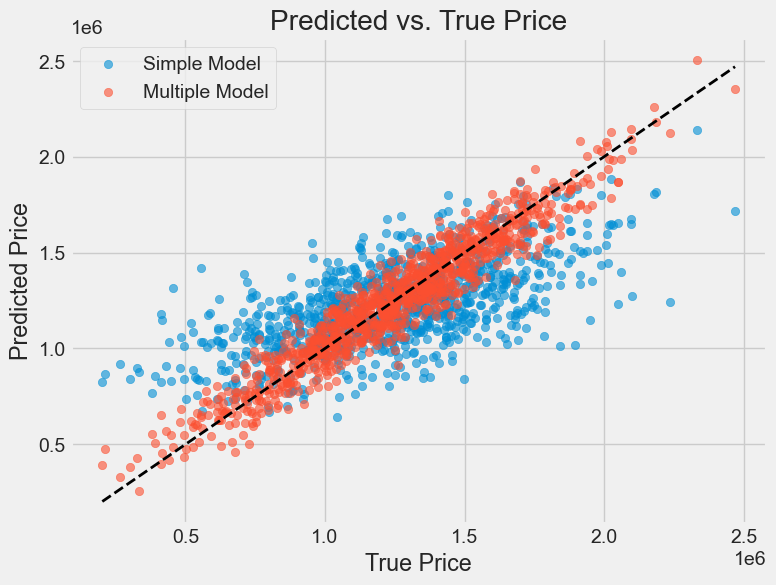

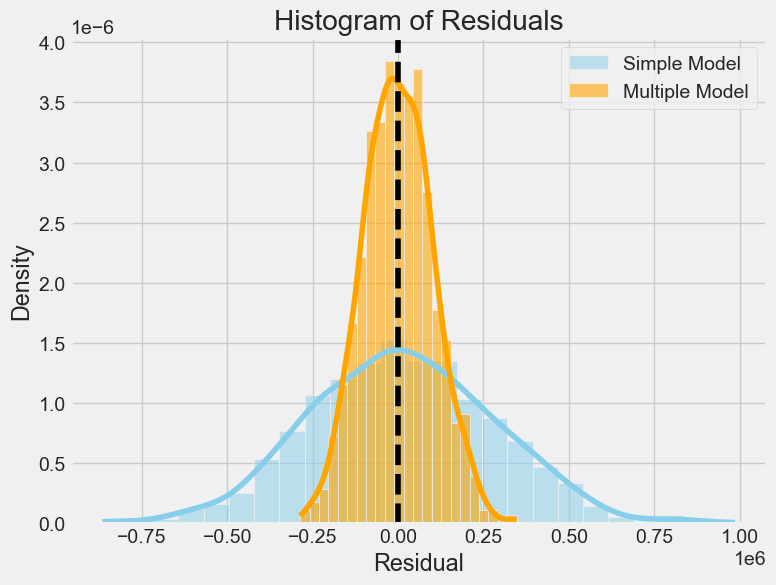

In [123]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_poly_s_predict, alpha=0.6, label='Simple Model')
plt.scatter(y_test, y_test_poly_predict, alpha=0.6, label='Multiple Model')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("True Price")
plt.ylabel("Predicted Price")
plt.title("Predicted vs. True Price")
plt.legend()
plt.grid(True)
plt.show()

residual_simple = y_test - y_test_simple_predict
residual_all = y_test - y_test_predict

plt.figure(figsize=(8, 6))
sns.histplot(residual_simple, kde=True, color="skyblue", label="Simple Model", stat="density")
sns.histplot(residual_all, kde=True, color="orange", label="Multiple Model", stat="density", alpha=0.6)
plt.axvline(0, color='black', linestyle='--')
plt.title("Histogram of Residuals")
plt.xlabel("Residual")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()

### Answer:

3. It does not seem like that the polynomial regression improved the prediction of the model. In general the error values is slightly worse. In particular looking at the $R^2$ it seems like that the polynomial model is worse at describing the variance in the data. But overall they perform similar.